In [1]:
import os                                                 # to set current working directory 
from sklearn.decomposition import PCA                     # PCA program from scikit learn (package for machine learning)
from sklearn.preprocessing import StandardScaler          # standardize variables to mean of 0.0 and variance of 1.0
import pandas as pd                                       # DataFrames and plotting
import pandas.plotting as pd_plot                         # matrix scatter plots
import numpy as np                                        # arrays and matrix math
import matplotlib.pyplot as plt                           # plotting

In [2]:
def plot_corr(dataframe,size=10):                         # plots a graphical correlation matrix 
    corr = dataframe.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    im = ax.matshow(corr,vmin = -1.0, vmax = 1.0)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.colorbar(im, orientation = 'vertical')
    plt.title('Correlation Matrix')

In [8]:
my_data = pd.read_excel("unconv.xlsx")                    # load the comma delimited data file

In [9]:
print(my_data)

     WellIndex    Por  LogPerm    AI  Brittle   TOC    VR   Production
0            1  15.91     1.67  3.06    14.05  1.36  1.85   177.381958
1            2  15.34     1.65  2.60    31.88  1.37  1.79  1479.767778
2            3  20.45     2.02  3.13    63.67  1.79  2.53  4421.221583
3            4  11.95     1.14  3.90    58.81  0.40  2.03  1488.317629
4            5  19.53     1.83  2.57    43.75  1.40  2.11  5261.094919
..         ...    ...      ...   ...      ...   ...   ...          ...
995        996  17.99     2.29  3.38    44.32  0.98  2.08  4211.527806
996        997  12.12     0.82  3.52    57.07 -0.04  1.73  1560.333735
997        998  15.55     1.50  2.48    58.25  1.89  2.35  2858.180459
998        999  20.89     2.02  3.23    46.17  1.71  2.27  6934.576348
999       1000  15.74     1.31  2.37    73.08  1.24  2.06   963.675793

[1000 rows x 8 columns]


In [10]:
my_data[:7]                                               # preview the first 7 rows of the dataframe

,WellIndex,Por,LogPerm,AI,Brittle,TOC,VR,Production
0,1,15.91,1.67,3.06,14.05,1.36,1.85,177.381958
1,2,15.34,1.65,2.60,31.88,1.37,1.79,1479.767778
2,3,20.45,2.02,3.13,63.67,1.79,2.53,4421.221583
3,4,11.95,1.14,3.90,58.81,0.40,2.03,1488.317629
4,5,19.53,1.83,2.57,43.75,1.40,2.11,5261.094919
5,6,19.47,2.04,2.73,54.37,1.42,2.12,5497.005506
6,7,12.70,1.30,3.70,43.03,0.45,1.95,1784.266285


In [11]:
my_data = my_data.iloc[:,1:8]                             # copy all rows and columns 1 through 8, note 0 column is removed
my_data.describe().transpose()                            # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Por,1000.0,14.950460,3.029634,5.400000,12.85750,14.98500,17.080000,24.65000
LogPerm,1000.0,1.398880,0.405966,0.120000,1.13000,1.39000,1.680000,2.58000
AI,1000.0,2.982610,0.577629,0.960000,2.57750,3.01000,3.360000,4.70000
Brittle,1000.0,49.719480,15.077006,-10.500000,39.72250,49.68000,59.170000,93.47000
TOC,1000.0,1.003810,0.504978,-0.260000,0.64000,0.99500,1.360000,2.71000
VR,1000.0,1.991170,0.308194,0.900000,1.81000,2.00000,2.172500,2.90000
Production,1000.0,2247.295809,1464.256312,2.713535,1191.36956,1976.48782,3023.594214,12568.64413


In [12]:
num = my_data._get_numeric_data()                         # get the numerical values
num[num < 0] = 0                                          # truncate negative values to 0.0
my_data.describe().transpose()                            # calculate summary statistics for the data


,count,mean,std,min,25%,50%,75%,max
Por,1000.0,14.950460,3.029634,5.400000,12.85750,14.98500,17.080000,24.65000
LogPerm,1000.0,1.398880,0.405966,0.120000,1.13000,1.39000,1.680000,2.58000
AI,1000.0,2.982610,0.577629,0.960000,2.57750,3.01000,3.360000,4.70000
Brittle,1000.0,49.731480,15.033593,0.000000,39.72250,49.68000,59.170000,93.47000
TOC,1000.0,1.006170,0.499838,0.000000,0.64000,0.99500,1.360000,2.71000
VR,1000.0,1.991170,0.308194,0.900000,1.81000,2.00000,2.172500,2.90000
Production,1000.0,2247.295809,1464.256312,2.713535,1191.36956,1976.48782,3023.594214,12568.64413


In [13]:
corr_matrix = np.corrcoef(my_data, rowvar = False)
print(np.around(corr_matrix,2))                           # print the correlation matrix to 2 decimals


[[ 1.    0.81 -0.51 -0.25  0.71  0.08  0.69]
 [ 0.81  1.   -0.32 -0.15  0.51  0.05  0.57]
 [-0.51 -0.32  1.    0.17 -0.55  0.49 -0.33]
 [-0.25 -0.15  0.17  1.   -0.24  0.3  -0.07]
 [ 0.71  0.51 -0.55 -0.24  1.    0.31  0.5 ]
 [ 0.08  0.05  0.49  0.3   0.31  1.    0.14]
 [ 0.69  0.57 -0.33 -0.07  0.5   0.14  1.  ]]


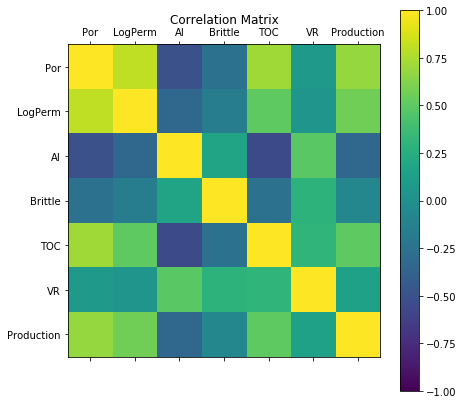

In [14]:
plot_corr(my_data,7)                                      # using our correlation matrix visualization function
plt.show()


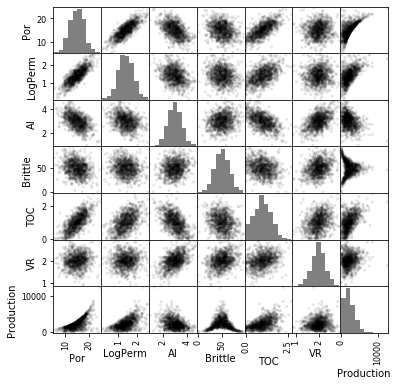

In [15]:
pd_plot.scatter_matrix(my_data, alpha = 0.1,              # pandas matrix scatter plot
    figsize=(6, 6),color = 'black', hist_kwds={'color':['grey']})
plt.show()


In [16]:
my_data_por_perm = my_data.iloc[0:100,0:2]                # extract just por and logperm, 100 samples
my_data_por_perm.describe().transpose()                   # calculate summary statistics for the data


,count,mean,std,min,25%,50%,75%,max
Por,100.0,14.9856,2.823016,9.23,12.9275,14.720,16.705,21.00
LogPerm,100.0,1.3947,0.390947,0.36,1.1475,1.365,1.650,2.48


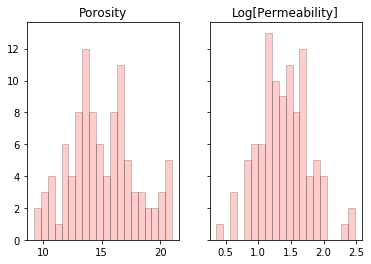

In [17]:

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(my_data_por_perm["Por"], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
ax1.set_title('Porosity')
ax2.hist(my_data_por_perm["LogPerm"], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
ax2.set_title('Log[Permeability]')
plt.show()

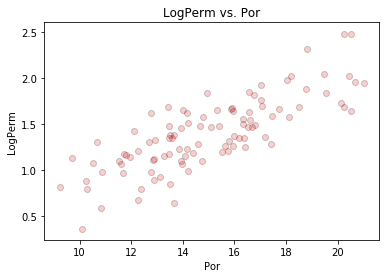

In [18]:
plt.scatter(my_data_por_perm["Por"],my_data_por_perm["LogPerm"],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
plt.title('LogPerm vs. Por'); plt.xlabel('Por'); plt.ylabel('LogPerm')
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler

features = ['Por','LogPerm']
x = my_data_por_perm.loc[:,features].values
mu = np.mean(x, axis=0)
sd = np.std(x, axis=0)
#x = StandardScaler().fit_transform(x)                     # standardize the data features to mean = 0, var = 1.0

print("Original Mean Por", np.round(mu[0],2), ', Original Mean LogPerm = ', np.round(mu[1],2)) 
print("Original StDev Por", np.round(sd[0],2), ', Original StDev LogPerm = ', np.round(sd[1],2)) 
print('Mean Transformed Por =',np.round(np.mean(x[:,0]),2),', Mean Transformed LogPerm =',np.round(np.mean(x[:,1]),2))
print('Variance Transformed Por =',np.var(x[:,0]),', Variance Transformed LogPerm =',np.var(x[:,1]))

Original Mean Por 14.99 , Original Mean LogPerm =  1.39
Original StDev Por 2.81 , Original StDev LogPerm =  0.39
Mean Transformed Por = 14.99 , Mean Transformed LogPerm = 1.39
Variance Transformed Por = 7.889726639999999 , Variance Transformed LogPerm = 0.15131091


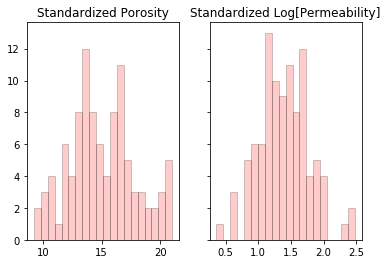

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(x[:,0], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
ax1.set_title('Standardized Porosity')
ax2.hist(x[:,1], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
ax2.set_title('Standardized Log[Permeability]')
plt.show()

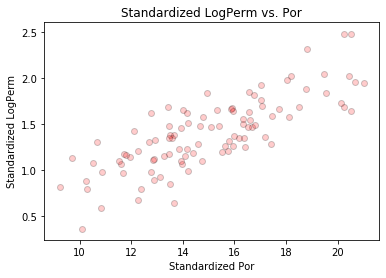

In [21]:
plt.scatter(x[:,0],x[:,1], s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
plt.title('Standardized LogPerm vs. Por'); plt.xlabel('Standardized Por'); plt.ylabel('Standardized LogPerm')
plt.show()

In [22]:
n_components = 2
pca = PCA(n_components=n_components)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [23]:
print(np.round(pca.components_,3))


[[ 0.994  0.11 ]
 [ 0.11  -0.994]]


In [24]:
print('Variance explained by PC1 and PC2 =', np.round(pca.explained_variance_ratio_,3))


Variance explained by PC1 and PC2 = [0.993 0.007]


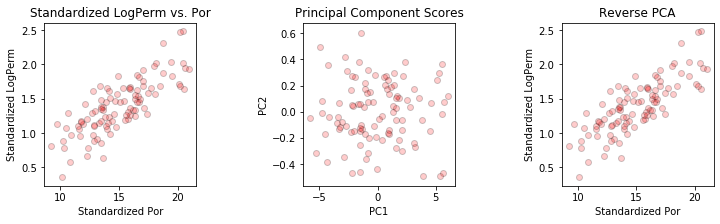

In [25]:
f, (ax101, ax102, ax103) = plt.subplots(1, 3,figsize=(12,3))
f.subplots_adjust(wspace=0.7)

ax101.scatter(x[:,0],x[:,1], s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
ax101.set_title('Standardized LogPerm vs. Por'); ax101.set_xlabel('Standardized Por'); ax101.set_ylabel('Standardized LogPerm')

x_trans = pca.transform(x)                                # calculate the principal component scores
ax102.scatter(x_trans[:,0],x_trans[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
ax102.set_title('Principal Component Scores'); ax102.set_xlabel('PC1'); ax102.set_ylabel('PC2')

x_reverse = pca.inverse_transform(x_trans)                        # reverse the principal component scores to standardized values
ax103.scatter(x_reverse[:,0],x_reverse[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
ax103.set_title('Reverse PCA'); ax103.set_xlabel('Standardized Por'); ax103.set_ylabel('Standardized LogPerm')
plt.show()

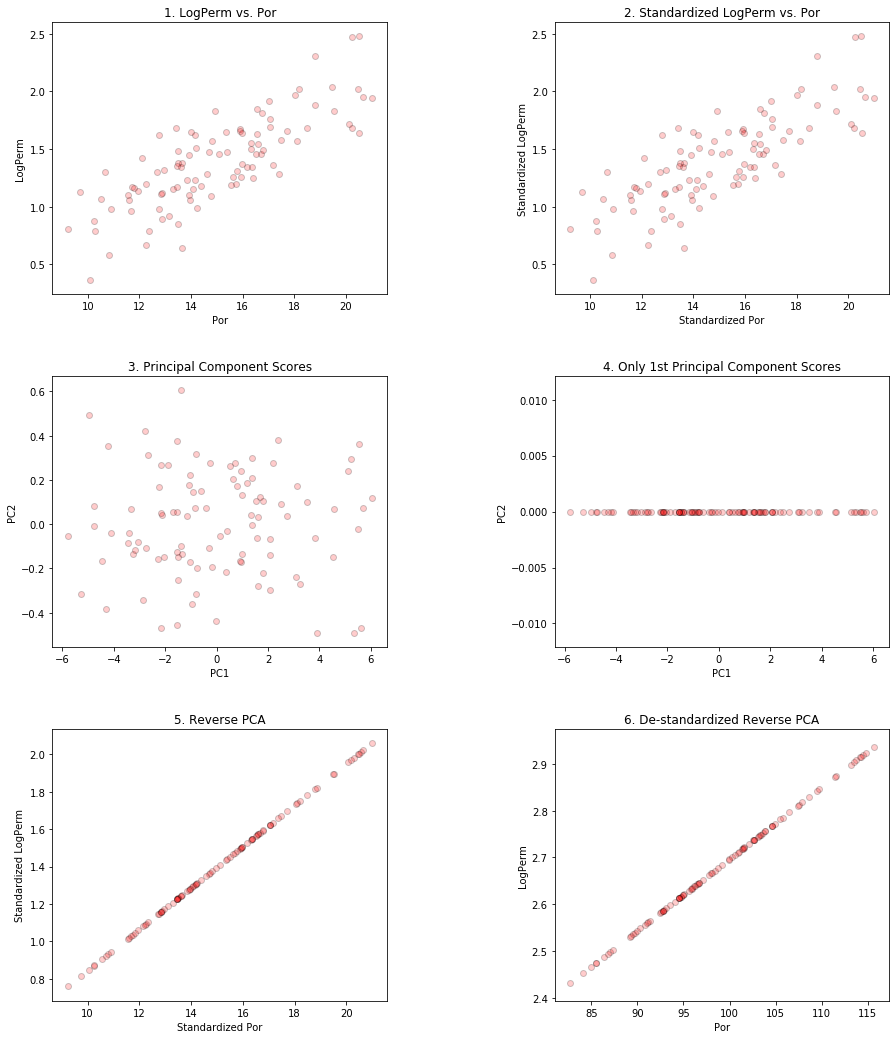

In [26]:
nComp = 1
f, ((ax201, ax202), (ax203, ax204), (ax205, ax206)) = plt.subplots(3, 2,figsize=(15,18))
f.subplots_adjust(wspace=0.5,hspace = 0.3)

ax201.scatter(my_data_por_perm["Por"],my_data_por_perm["LogPerm"],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
ax201.set_title('1. LogPerm vs. Por'); ax201.set_xlabel('Por'); ax201.set_ylabel('LogPerm')

mu = np.mean(x, axis=0)
sd = np.std(x, axis=0)
x_stand = StandardScaler().fit_transform(x)                     # standardize the data features to mean = 0, var = 1.0

ax202.scatter(x[:,0],x[:,1], s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
ax202.set_title('2. Standardized LogPerm vs. Por'); ax202.set_xlabel('Standardized Por'); ax202.set_ylabel('Standardized LogPerm')

n_components = 2                                          # build principal component model with 2 components
pca = PCA(n_components=n_components)
pca.fit(x)

x_trans = pca.transform(x)                                # calculate principal component scores
ax203.scatter(x_trans[:,0],x_trans[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
ax203.set_title('3. Principal Component Scores'); ax203.set_xlabel('PC1'); ax203.set_ylabel('PC2')

x_trans[:,1] = 0.0                                         # zero / remove the 2nd principal component 

ax204.scatter(x_trans[:,0],x_trans[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
ax204.set_title('4. Only 1st Principal Component Scores'); ax204.set_xlabel('PC1'); ax204.set_ylabel('PC2')

xhat = pca.inverse_transform(x_trans)                             # reverse the principal component scores to standardized values
ax205.scatter(xhat[:,0],xhat[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
ax205.set_title('5. Reverse PCA'); ax205.set_xlabel('Standardized Por'); ax205.set_ylabel('Standardized LogPerm')

xhat = np.dot(pca.inverse_transform(x)[:,:nComp], pca.components_[:nComp,:])
xhat = sd*xhat + mu                                       # remove the standardization

ax206.scatter(xhat[:,0],xhat[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
ax206.set_title('6. De-standardized Reverse PCA'); ax206.set_xlabel('Por'); ax206.set_ylabel('LogPerm')

plt.show()


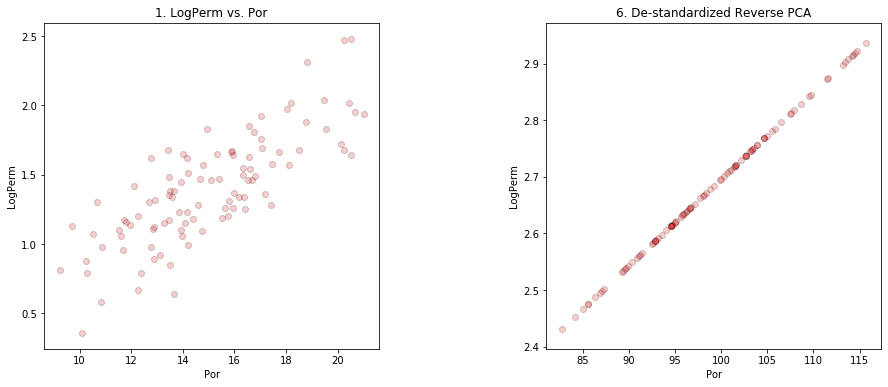

Variance Por = 7.89 , Variance Reduced Dimensional Por = 62.242 Fraction =  7.889
Variance LogPerm = 7.89 , Variance Reduced Dimensional LogPerm = 0.015 Fraction =  0.096


In [27]:
f, (ax201, ax206) = plt.subplots(1, 2,figsize=(15,6))
f.subplots_adjust(wspace=0.5,hspace = 0.3)

ax201.scatter(my_data_por_perm["Por"],my_data_por_perm["LogPerm"],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
ax201.set_title('1. LogPerm vs. Por'); ax201.set_xlabel('Por'); ax201.set_ylabel('LogPerm')

ax206.scatter(xhat[:,0],xhat[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
ax206.set_title('6. De-standardized Reverse PCA'); ax206.set_xlabel('Por'); ax206.set_ylabel('LogPerm')
plt.show()

var_por = np.var(my_data_por_perm["Por"]); var_por_hat = np.var(xhat[:,0]);
var_logperm = np.var(my_data_por_perm["LogPerm"]); var_logperm_hat = np.var(xhat[:,1]);
print('Variance Por =',np.round(var_por,3),', Variance Reduced Dimensional Por =',np.round(var_por_hat,3),'Fraction = ',np.round(var_por_hat/var_por,3))
print('Variance LogPerm =',np.round(var_por,3),', Variance Reduced Dimensional LogPerm =',np.round(var_logperm_hat,3),'Fraction = ',np.round(var_logperm_hat/var_logperm,3))

In [28]:
my_data_f6 = my_data.iloc[0:500,0:6]                      # extract the 6 predictors, 500 samples

In [29]:
my_data_f6.describe().transpose()                         # calculate summary statistics for the data


,count,mean,std,min,25%,50%,75%,max
Por,500.0,14.89936,2.985967,5.40,12.8500,14.900,17.0125,23.85
LogPerm,500.0,1.40010,0.409616,0.18,1.1475,1.380,1.6700,2.58
AI,500.0,2.99244,0.563674,1.21,2.5900,3.035,3.3725,4.70
Brittle,500.0,49.74682,15.212123,0.00,39.3125,49.595,59.2075,93.47
TOC,500.0,0.99800,0.503635,0.00,0.6400,0.960,1.3500,2.71
VR,500.0,1.99260,0.307434,0.90,1.8200,2.010,2.1725,2.84


In [30]:
corr_matrix = np.corrcoef(my_data_f6, rowvar = False)
print(np.around(corr_matrix,2))                           # print the correlation matrix to 2 decimals


[[ 1.    0.79 -0.49 -0.25  0.71  0.12]
 [ 0.79  1.   -0.32 -0.13  0.48  0.04]
 [-0.49 -0.32  1.    0.14 -0.53  0.47]
 [-0.25 -0.13  0.14  1.   -0.24  0.24]
 [ 0.71  0.48 -0.53 -0.24  1.    0.35]
 [ 0.12  0.04  0.47  0.24  0.35  1.  ]]


In [31]:
from sklearn.preprocessing import StandardScaler

features = ['Por','LogPerm','AI','Brittle','TOC','VR']
x_f6 = my_data_f6.loc[:,features].values
mu_f6 = np.mean(x_f6, axis=0)
sd_f6 = np.std(x_f6, axis=0)
x_f6 = StandardScaler().fit_transform(x_f6)
 
print("Original Means", features[:], np.round(mu_f6[:],2)) 
print("Original StDevs", features[:],np.round(sd_f6[:],2)) 
print('Mean Transformed =',features[:],np.round(x.mean(axis=0),2))
print('Variance Transformed Por =',features[:],np.round(x.var(axis=0),2))

Original Means ['Por', 'LogPerm', 'AI', 'Brittle', 'TOC', 'VR'] [14.9   1.4   2.99 49.75  1.    1.99]
Original StDevs ['Por', 'LogPerm', 'AI', 'Brittle', 'TOC', 'VR'] [ 2.98  0.41  0.56 15.2   0.5   0.31]
Mean Transformed = ['Por', 'LogPerm', 'AI', 'Brittle', 'TOC', 'VR'] [14.99  1.39]
Variance Transformed Por = ['Por', 'LogPerm', 'AI', 'Brittle', 'TOC', 'VR'] [7.89 0.15]


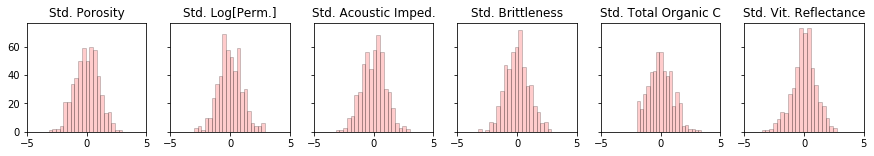

In [32]:
f, (ax6,ax7,ax8,ax9,ax10,ax11) = plt.subplots(1, 6, sharey=True, figsize=(15,2))
ax6.hist(x_f6[:,0], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20); ax6.set_title('Std. Porosity'); ax6.set_xlim(-5,5)
ax7.hist(x_f6[:,1], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20); ax7.set_title('Std. Log[Perm.]'); ax7.set_xlim(-5,5)
ax8.hist(x_f6[:,2], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20); ax8.set_title('Std. Acoustic Imped.'); ax8.set_xlim(-5,5)
ax9.hist(x_f6[:,3], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20); ax9.set_title('Std. Brittleness'); ax9.set_xlim(-5,5)
ax10.hist(x_f6[:,4], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20); ax10.set_title('Std. Total Organic C'); ax10.set_xlim(-5,5)
ax11.hist(x_f6[:,5], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20); ax11.set_title('Std. Vit. Reflectance'); ax11.set_xlim(-5,5)
plt.show()


In [33]:
# Principal Component Analysis

n_components = 6
pca_f6 = PCA(n_components=n_components)
pca_f6.fit(x_f6)

print(np.round(pca_f6.components_,3))                     # visualize the component loadings


[[ 0.558  0.476 -0.405 -0.211  0.504  0.01 ]
 [-0.117 -0.114 -0.432 -0.323 -0.229 -0.794]
 [-0.019 -0.124  0.384 -0.898  0.07   0.157]
 [-0.214 -0.674 -0.424 -0.006  0.526  0.21 ]
 [-0.784  0.522 -0.031 -0.046  0.331 -0.019]
 [ 0.12  -0.138  0.566  0.206  0.55  -0.549]]


In [34]:
print('Variance explained by PC1 thru PC6 =', np.round(pca_f6.explained_variance_ratio_,3))

Variance explained by PC1 thru PC6 = [0.462 0.246 0.149 0.11  0.024 0.009]


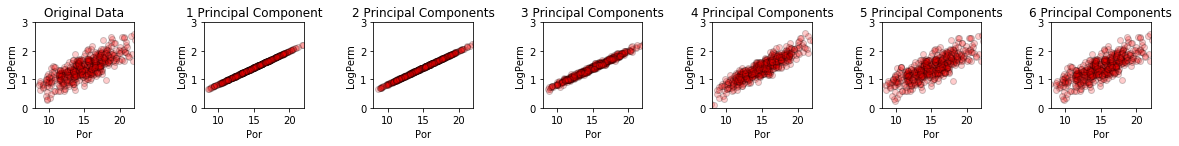

In [35]:
nComp = 6
xhat_6d = np.dot(pca_f6.transform(x_f6)[:,:nComp], pca_f6.components_[:nComp,:])
xhat_6d = sd_f6*xhat_6d + mu_f6

nComp = 5
xhat_5d = np.dot(pca_f6.transform(x_f6)[:,:nComp], pca_f6.components_[:nComp,:])
xhat_5d = sd_f6*xhat_5d + mu_f6

nComp = 4
xhat_4d = np.dot(pca_f6.transform(x_f6)[:,:nComp], pca_f6.components_[:nComp,:])
xhat_4d = sd_f6*xhat_4d + mu_f6

nComp = 3
xhat_3d = np.dot(pca_f6.transform(x_f6)[:,:nComp], pca_f6.components_[:nComp,:])
xhat_3d = sd_f6*xhat_3d + mu_f6

nComp = 2
xhat_2d = np.dot(pca_f6.transform(x_f6)[:,:nComp], pca_f6.components_[:nComp,:])
xhat_2d = sd_f6*xhat_2d + mu_f6

nComp = 1
xhat_1d = np.dot(pca_f6.transform(x_f6)[:,:nComp], pca_f6.components_[:nComp,:])
xhat_1d = sd_f6*xhat_1d + mu_f6

f, (ax12, ax13, ax14, ax15, ax16, ax17, ax18) = plt.subplots(1, 7,figsize=(20,20))
f.subplots_adjust(wspace=0.7)

ax12.scatter(my_data_f6["Por"],my_data_f6["LogPerm"],s=None, c="red",marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
ax12.set_title('Original Data'); ax12.set_xlabel('Por'); ax12.set_ylabel('LogPerm')
ax12.set_ylim(0.0,3.0); ax12.set_xlim(8,22); ax12.set_aspect(4.0); 

ax13.scatter(xhat_1d[:,0],xhat_1d[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
ax13.set_title('1 Principal Component'); ax13.set_xlabel('Por'); ax13.set_ylabel('LogPerm')
ax13.set_ylim(0.0,3.0); ax13.set_xlim(8,22); ax13.set_aspect(4.0)

ax14.scatter(xhat_2d[:,0],xhat_2d[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
ax14.set_title('2 Principal Components'); ax14.set_xlabel('Por'); ax14.set_ylabel('LogPerm')
ax14.set_ylim(0.0,3.0); ax14.set_xlim(8,22); ax14.set_aspect(4.0)

ax15.scatter(xhat_3d[:,0],xhat_3d[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
ax15.set_title('3 Principal Components'); ax15.set_xlabel('Por'); ax15.set_ylabel('LogPerm')
ax15.set_ylim(0.0,3.0); ax15.set_xlim(8,22); ax15.set_aspect(4.0)

ax16.scatter(xhat_4d[:,0],xhat_4d[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
ax16.set_title('4 Principal Components'); ax16.set_xlabel('Por'); ax16.set_ylabel('LogPerm')
ax16.set_ylim(0.0,3.0); ax16.set_xlim(8,22); ax16.set_aspect(4.0)

ax17.scatter(xhat_5d[:,0],xhat_5d[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
ax17.set_title('5 Principal Components'); ax17.set_xlabel('Por'); ax17.set_ylabel('LogPerm')
ax17.set_ylim(0.0,3.0); ax17.set_xlim(8,22); ax17.set_aspect(4.0)

ax18.scatter(xhat_6d[:,0],xhat_6d[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
ax18.set_title('6 Principal Components'); ax18.set_xlabel('Por'); ax18.set_ylabel('LogPerm')
ax18.set_ylim(0.0,3.0); ax18.set_xlim(8,22); ax18.set_aspect(4.0)

plt.show()


In [36]:
print('1 Principal Component : Variance Por =',np.round(np.var(xhat_1d[:,0])/(sd_f6[0]*sd_f6[0]),2),' Variance Log Perm = ',np.round(np.var(xhat_1d[:,1])/(sd_f6[1]*sd_f6[1]),2))

print('2 Principal Components: Variance Por =',np.round(np.var(xhat_2d[:,0])/(sd_f6[0]*sd_f6[0]),2),' Variance Log Perm = ',np.round(np.var(xhat_2d[:,1])/(sd_f6[1]*sd_f6[1]),2))

print('3 Principal Components: Variance Por =',np.round(np.var(xhat_3d[:,0])/(sd_f6[0]*sd_f6[0]),2),' Variance Log Perm = ',np.round(np.var(xhat_3d[:,1])/(sd_f6[1]*sd_f6[1]),2))

print('4 Principal Components: Variance Por =',np.round(np.var(xhat_4d[:,0])/(sd_f6[0]*sd_f6[0]),2),' Variance Log Perm = ',np.round(np.var(xhat_4d[:,1])/(sd_f6[1]*sd_f6[1]),2))

print('5 Principal Components: Variance Por =',np.round(np.var(xhat_5d[:,0])/(sd_f6[0]*sd_f6[0]),2),'  Variance Log Perm = ',np.round(np.var(xhat_5d[:,1])/(sd_f6[1]*sd_f6[1]),2))

print('6 Principal Components: Variance Por =',np.round(np.var(xhat_6d[:,0])/(sd_f6[0]*sd_f6[0]),2),'  Variance Log Perm = ',np.round(np.var(xhat_6d[:,1])/(sd_f6[1]*sd_f6[1]),2))

1 Principal Component : Variance Por = 0.86  Variance Log Perm =  0.63
2 Principal Components: Variance Por = 0.88  Variance Log Perm =  0.65
3 Principal Components: Variance Por = 0.88  Variance Log Perm =  0.66
4 Principal Components: Variance Por = 0.91  Variance Log Perm =  0.96
5 Principal Components: Variance Por = 1.0   Variance Log Perm =  1.0
6 Principal Components: Variance Por = 1.0   Variance Log Perm =  1.0


In [37]:
df_1d = pd.DataFrame(data=xhat_1d,columns=features)   
df_2d = pd.DataFrame(data=xhat_2d,columns=features)
df_3d = pd.DataFrame(data=xhat_3d,columns=features)
df_4d = pd.DataFrame(data=xhat_4d,columns=features)
df_5d = pd.DataFrame(data=xhat_5d,columns=features)
df_6d = pd.DataFrame(data=xhat_6d,columns=features)

<Figure size 432x288 with 0 Axes>

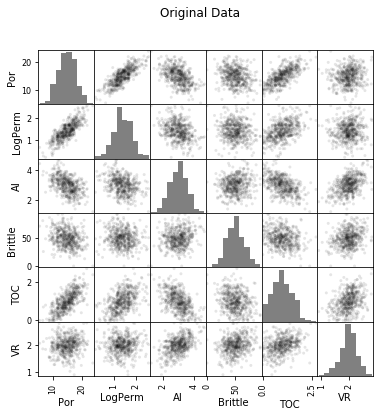

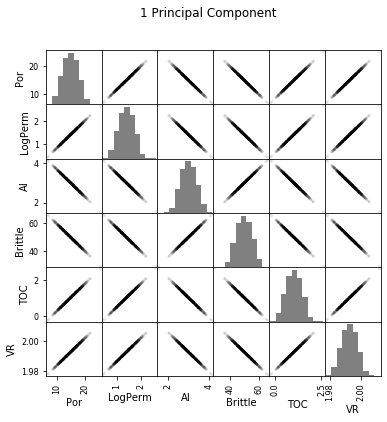

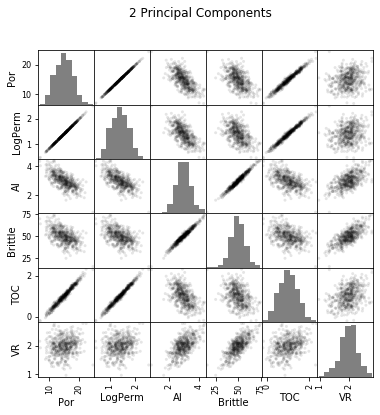

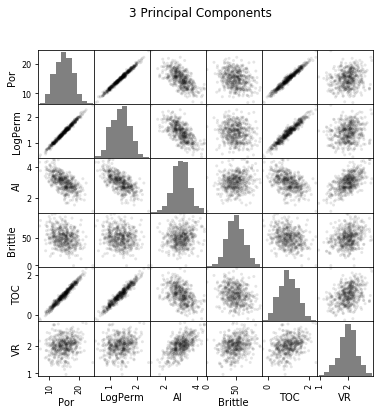

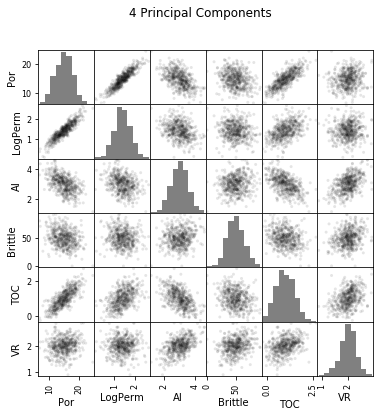

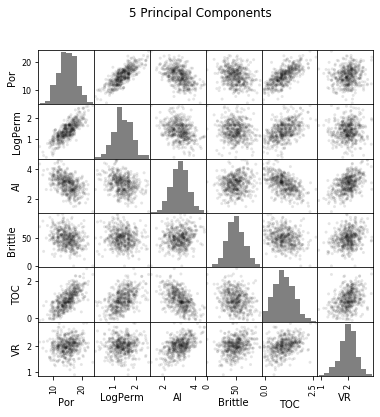

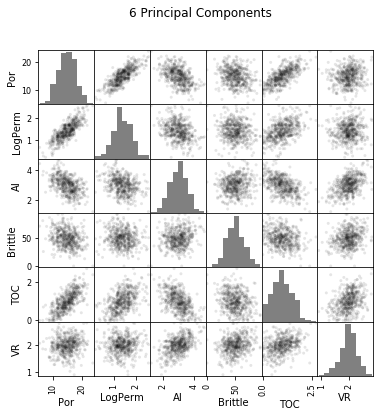

In [38]:
fig = plt.figure()

pd_plot.scatter_matrix(my_data_f6, alpha = 0.1,           # pandas matrix scatter plot
    figsize=(6, 6),color = 'black', hist_kwds={'color':['grey']})
plt.suptitle('Original Data')

pd_plot.scatter_matrix(df_1d, alpha = 0.1,                # pandas matrix scatter plot
    figsize=(6, 6),color = 'black', hist_kwds={'color':['grey']})
plt.suptitle('1 Principal Component')

pd_plot.scatter_matrix(df_2d, alpha = 0.1,                # pandas matrix scatter plot
    figsize=(6, 6),color = 'black', hist_kwds={'color':['grey']})
plt.suptitle('2 Principal Components')

pd_plot.scatter_matrix(df_3d, alpha = 0.1,                # pandas matrix scatter plot
    figsize=(6, 6),color = 'black', hist_kwds={'color':['grey']})
plt.suptitle('3 Principal Components')

pd_plot.scatter_matrix(df_4d, alpha = 0.1,                # pandas matrix scatter plot
    figsize=(6, 6),color = 'black', hist_kwds={'color':['grey']})
plt.suptitle('4 Principal Components')

pd_plot.scatter_matrix(df_5d, alpha = 0.1,                # pandas matrix scatter plot
    figsize=(6, 6),color = 'black', hist_kwds={'color':['grey']})
plt.suptitle('5 Principal Components')

pd_plot.scatter_matrix(df_6d, alpha = 0.1,                # pandas matrix scatter plot
    figsize=(6, 6),color = 'black', hist_kwds={'color':['grey']})
plt.suptitle('6 Principal Components')

plt.show()
